#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#IMPORTING DATASET

Main Dataset : data application (train)

In [2]:
app_train = pd.read_csv("application_train.csv")

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#EXPLORING DATA

In [4]:
#Info Kolom
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
print("Jumlah baris: {}\nJumlah kolom: {}".format(app_train.shape[0], app_train.shape[1]))

Jumlah baris: 307511
Jumlah kolom: 122


Pengamatan:
1. Data terdiri dari 307511 Baris dan 122 Kolom
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)

In [6]:
app_train = app_train.drop(['SK_ID_CURR','NAME_TYPE_SUITE','OWN_CAR_AGE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','EXT_SOURCE_1','YEARS_BUILD_AVG',
                            'COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','FONDKAPREMONT_MODE','YEARS_BUILD_MEDI','NONLIVINGAPARTMENTS_AVG',
                            'YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','NONLIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','COMMONAREA_MEDI','FLOORSMIN_MEDI',
                            'LIVINGAPARTMENTS_MEDI'], axis=1)

#LOADING DATASET

In [7]:
#Melihat semua Kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Menampilkan 5 baris pertama dari dataset

In [8]:
app_train.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
208747,0,Cash loans,M,Y,N,0,225000.0,1125000.0,46557.0,1125000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.007274,-21156,365243,-14721.0,-4668,1,0,0,1,0,0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,0.606566,0.859924,0.0371,0.0634,0.9791,0.00,0.0690,0.1667,0.0000,0.0216,0.0267,0.0378,0.0658,0.9791,0.0000,0.0690,0.1667,0.0000,0.0225,0.0282,0.0375,0.0634,0.9791,0.00,0.0690,0.1667,0.000,0.0220,0.0272,block of flats,0.0314,"Stone, brick",No,1.0,0.0,1.0,0.0,-2787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
174571,1,Cash loans,F,N,N,0,135000.0,339948.0,24174.0,315000.0,Working,Secondary / secondary special,Separated,Municipal apartment,0.046220,-15990,-3286,-8625.0,-1863,1,1,1,1,0,0,NaN,1.0,1,1,0,0,0,0,0,0,Business Entity Type 1,0.641133,NaN,0.0619,0.0649,0.9836,NaN,0.1379,0.1667,NaN,0.0534,0.0245,0.0630,0.0674,0.9836,NaN,0.1379,0.1667,NaN,0.0556,0.0259,0.0625,0.0649,0.9836,NaN,0.1379,0.1667,NaN,0.0544,0.0250,block of flats,0.0420,Panel,No,1.0,1.0,1.0,0.0,-266.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
140612,0,Cash loans,F,N,N,0,225000.0,770292.0,39460.5,688500.0,Working,Secondary / secondary special,Separated,House / apartment,0.025164,-14571,-7840,-7491.0,-4495,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,0,0,Business Entity Type 2,0.259808,0.712155,0.2387,0.1711,0.9856,0.26,0.2241,0.3333,0.1484,0.2445,0.0097,0.1492,0.1109,0.9856,0.1611,0.1379,0.3333,0.0678,0.1564,0.0084,0.2410,0.1711,0.9856,0.26,0.2241,0.3333,0.151,0.2489,0.0099,block of flats,0.3471,Panel,No,2.0,0.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,7.0
117825,0,Cash loans,F,N,Y,1,135000.0,1006920.0,40063.5,900000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.010147,-14215,-3294,-4950.0,-5232,1,1,0,1,0,0,Sales staff,3.0,2,2,0,0,0,0,0,0,Self-employed,0.491797,0.483050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1321.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
28671,0,Revolving loans,M,N,Y,0,283500.0,180000.0,9000.0,180000.0,Commercial associate,Secondary / secondary special,Single / 

#DEFINE TARGET VARIABLE

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel TARGET adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [9]:
app_train_app = app_train.copy()

# Menghitung jumlah klien yang tidak kesulitan dan klien yang kesulitan dalam pembayaran pinjaman
app_train_client = pd.DataFrame({
            'Target' : [0, 1],
            'Description' : ['No Payment Difficulties', 'Payment Difficulties'],
            'Count' : [(app_train_app['TARGET'].value_counts()[0]), (app_train_app['TARGET'].value_counts()[1])],
            'Percentage': [((app_train_app['TARGET'].value_counts()[0])/len(app_train_app['TARGET'])*100), ((app_train_app['TARGET'].value_counts()[1])/len(app_train_app['TARGET'])*100)]
})

app_train_client

,Target,Description,Count,Percentage
0,0,No Payment Difficulties,282686,91.927118
1,1,Payment Difficulties,24825,8.072882


Dapat dilihat bahwa variabel TARGET memiliki 2 nilai:

- `TARGET = 0` : Klien yang tidak kesulitan dalam pembayaran pinjaman
- `TARGET = 1` : Klien yang kesulitan dalam pembayaran pinjaman

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan bad loan (peminjam yang buruk) atau good loan (peminjam yang baik)

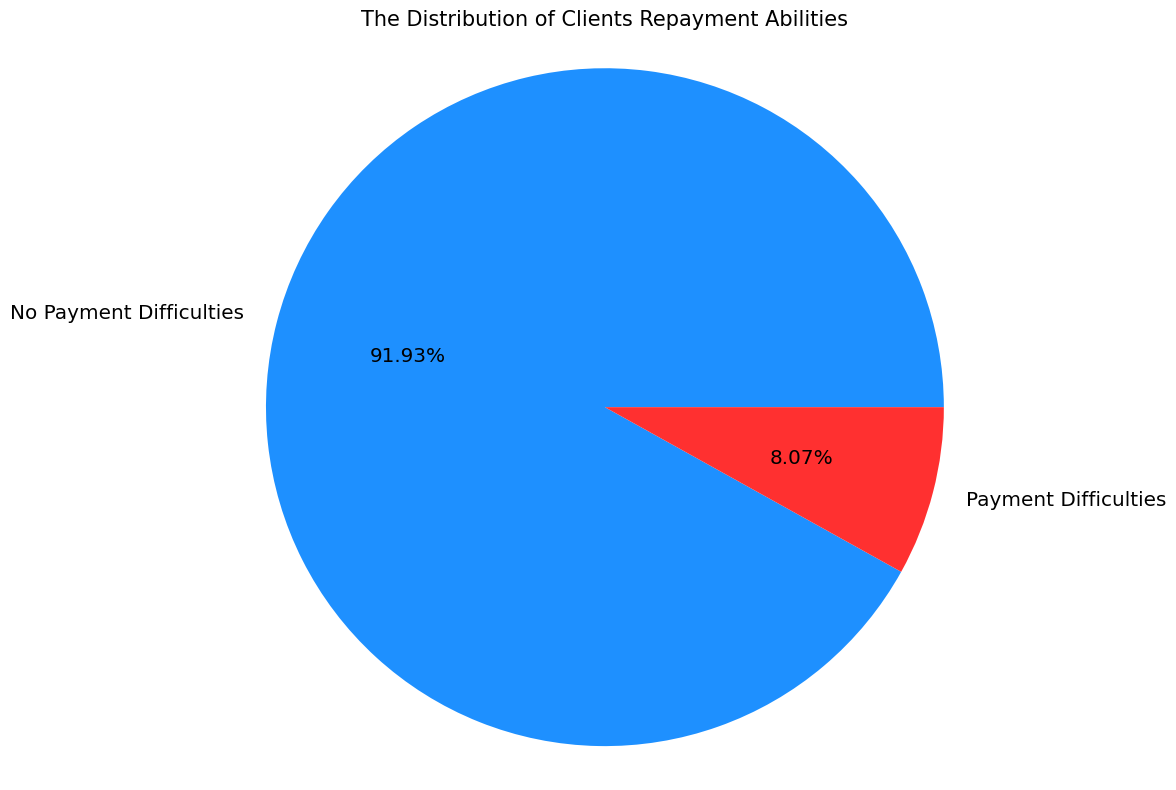

In [10]:
# Pie chart perbandingan jumlah klien yang tidak kesulitan dan kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(10,8))
labels = ['No Payment Difficulties','Payment Difficulties']
colors = ['#1E90FF', '#FF3030']
plt.pie(app_train_client['Count'],
        labels = labels,
        autopct='%.2f%%',
        colors=colors,
        textprops={'size': 'x-large'})
plt.title('The Distribution of Clients Repayment Abilities', size=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

Ada 282686 klien (91.93% dari keseluruhan) merupakan klien yang tidak kesulitan dalam pembayaran pinjaman. Sementara itu, ada 24825 klien (8.07% dari keseluruhan) merupakan klien yang mengalami kesulitan dalam pembayaran pinjaman.


#EXPLORATORY DATA ANALYSIS

##Correlation Check

<ipython-input-11-7bc9a7dbfc0b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(app_train.corr())


<Axes: >

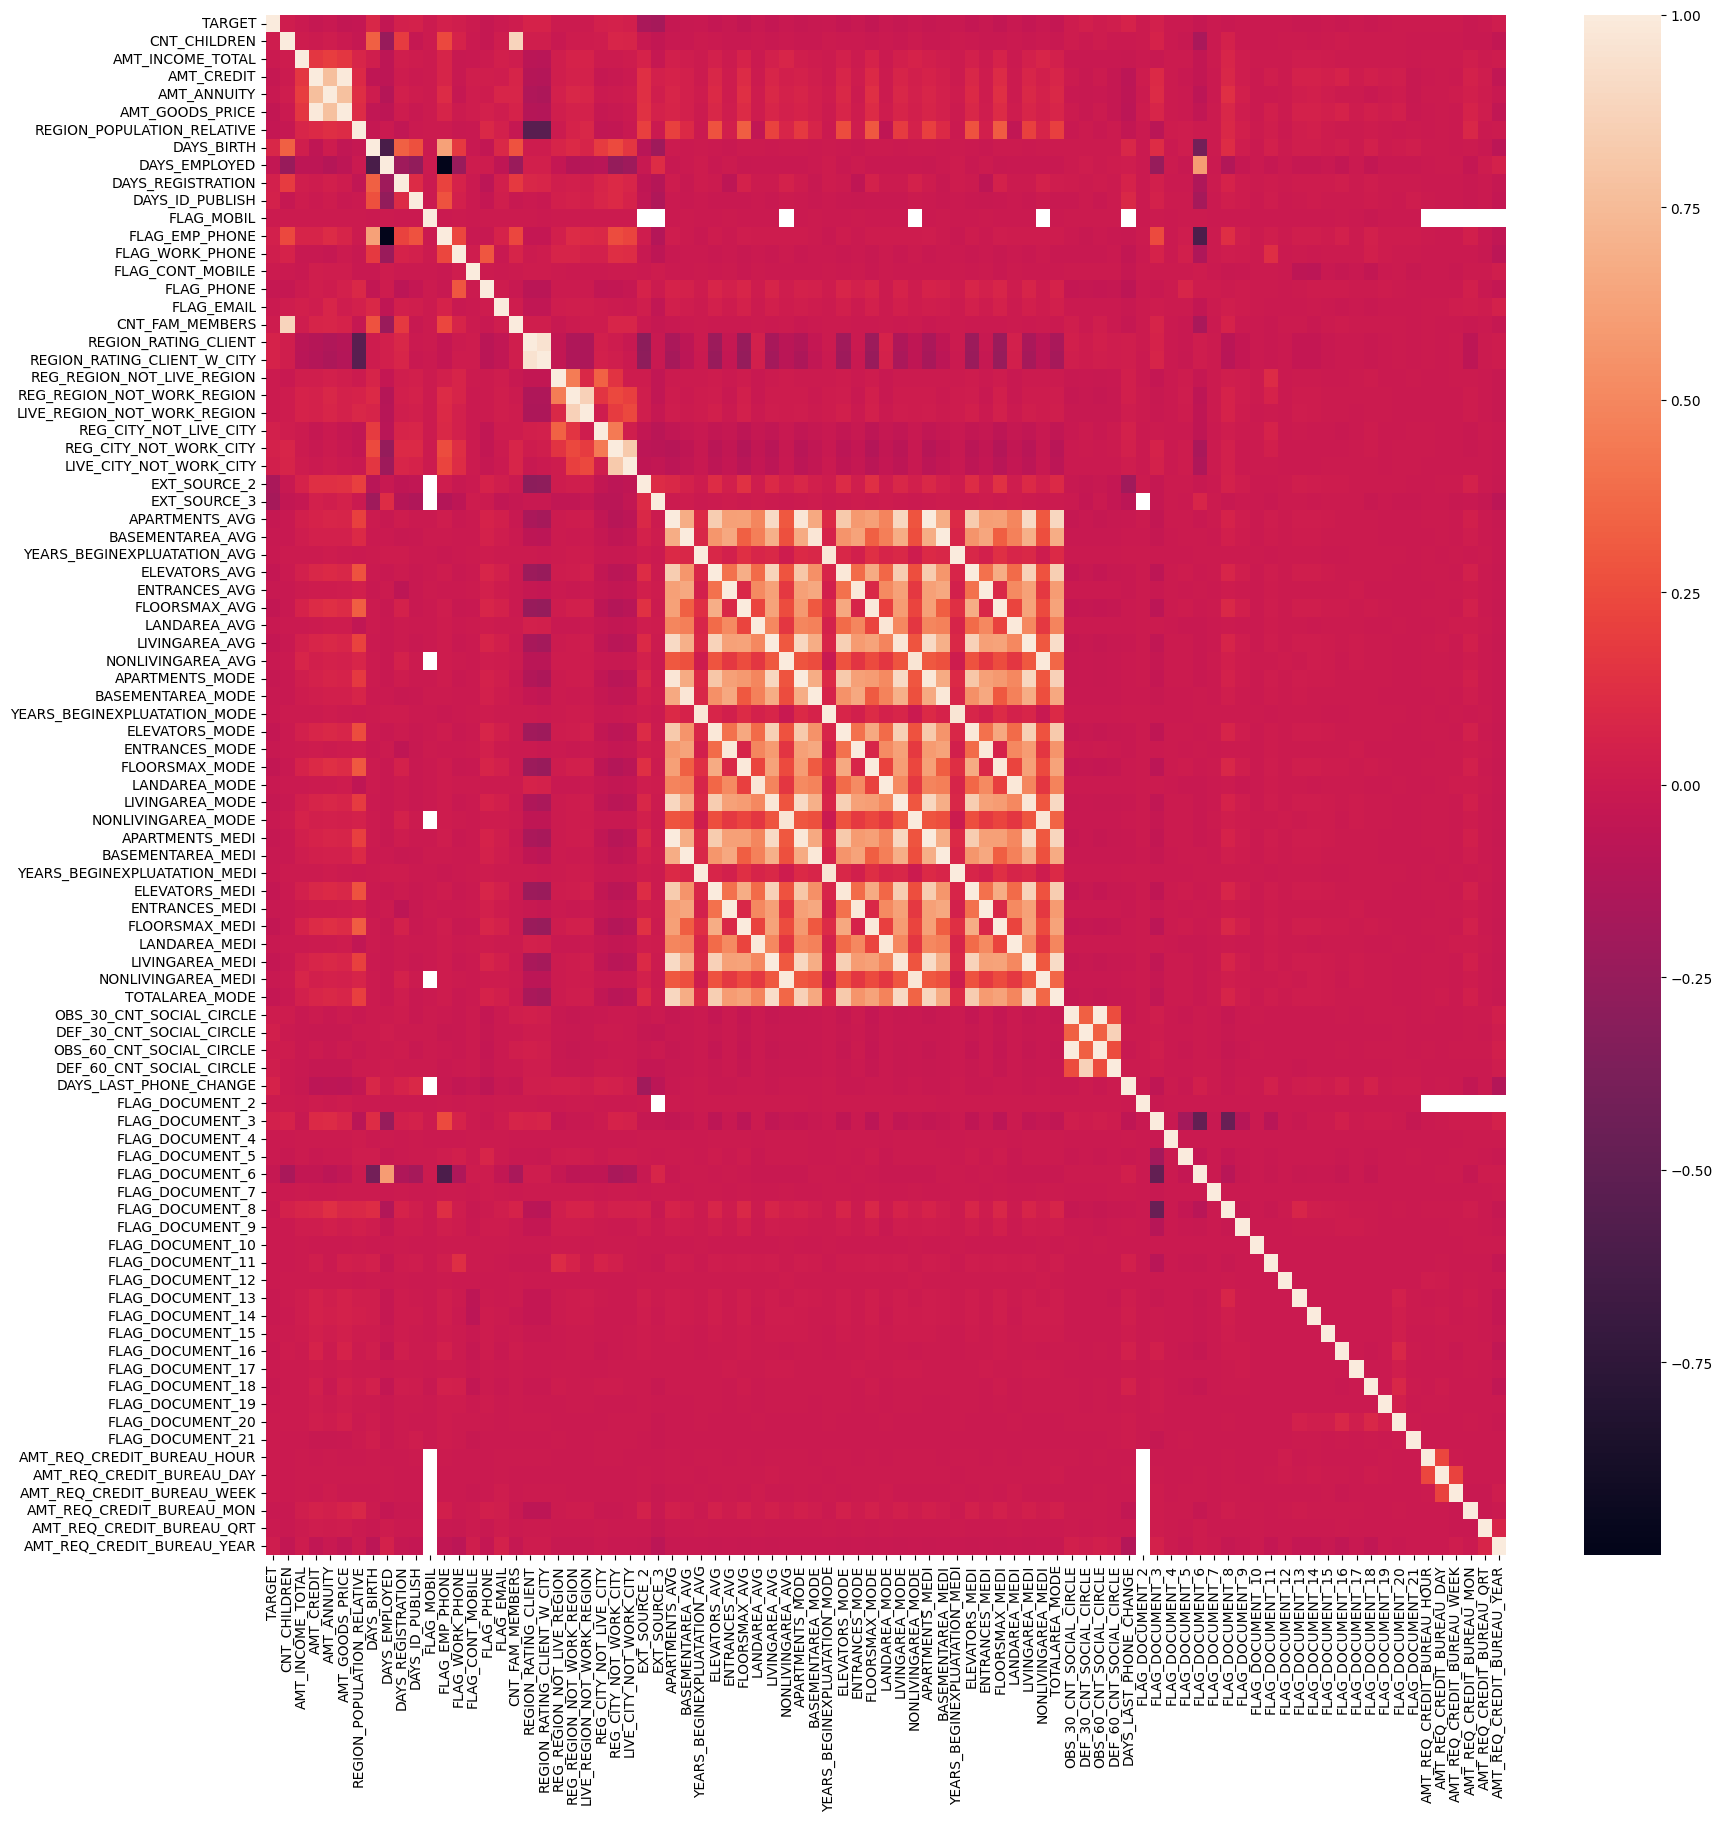

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(app_train.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [12]:
corr_matrix = app_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

<ipython-input-12-bd2f81fefadd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = app_train.corr().abs()
<ipython-input-12-bd2f81fefadd>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [13]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LANDAREA_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [14]:
app_train.drop(to_drop_hicorr, axis=1, inplace=True)

##Check Categorical Features

In [15]:
app_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
HOUSETYPE_MODE          3
WALLSMATERIAL_MODE      7
EMERGENCYSTATE_MODE     2
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [16]:
app_train.drop(['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [17]:
app_train.select_dtypes(exclude='object').nunique()

TARGET                              2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
EXT_SOURCE_2                   119831
EXT_SOURCE_3                      814
APARTMENTS_AVG                   2339
BASEMENTAREA_AVG                 3780
YEARS_BEGINEXPLUATATION_AVG       285
ENTRANCES_AVG                     285
FLOORSMAX_AVG                     403
LANDAREA_AVG

In [18]:
for col in app_train.select_dtypes(include='object').columns.tolist():
    print(app_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
S

# Bivariate Analysis : Numerical Features vs Target

In [19]:
# Mengubah nilai dalam kolom 'TARGET' menjadi keterangan 'No Payment Difficulties' dan 'Payment Difficulties'
client_map = {0: "No Payment Difficulties", 1: "Payment Difficulties"}
def decode_sentiment(label):
    return client_map[int(label)]

app_train_app['TARGET'] = app_train_app['TARGET'].apply(lambda x: decode_sentiment(x))

In [20]:
app_train_app.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Payment Difficulties,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.00,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,No Payment Difficulties,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0.0924,0.0538,0.9851,0.0806,0.0345,0.2917,0.0128,0.0554,0.0,0.0968,0.0529,0.9851,0.08,0.0345,0.2917,0.0132,0.0558,0.01,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,No Payment Difficulties,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,No Payment Difficulties,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,No Payment Difficulties,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not marri

# Age VS Target

In [21]:
# Membuat variabel yang menampung data umur klien yang tidak kesulitan dan yang kesulitan dalam pembayaran pinjaman
age_no = abs(app_train_app[app_train_app['TARGET']=='No Payment Difficulties']['DAYS_BIRTH'].values / 365)
age_yes = abs(app_train_app[app_train_app['TARGET']=='Payment Difficulties']['DAYS_BIRTH'].values / 365)

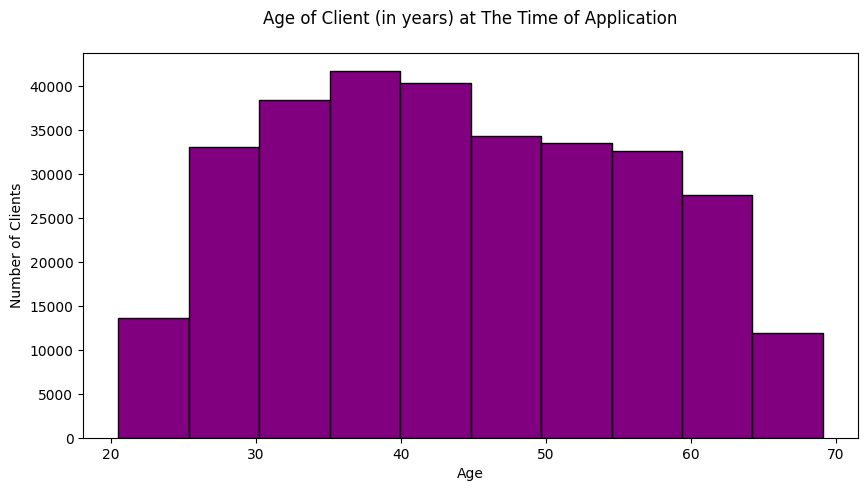

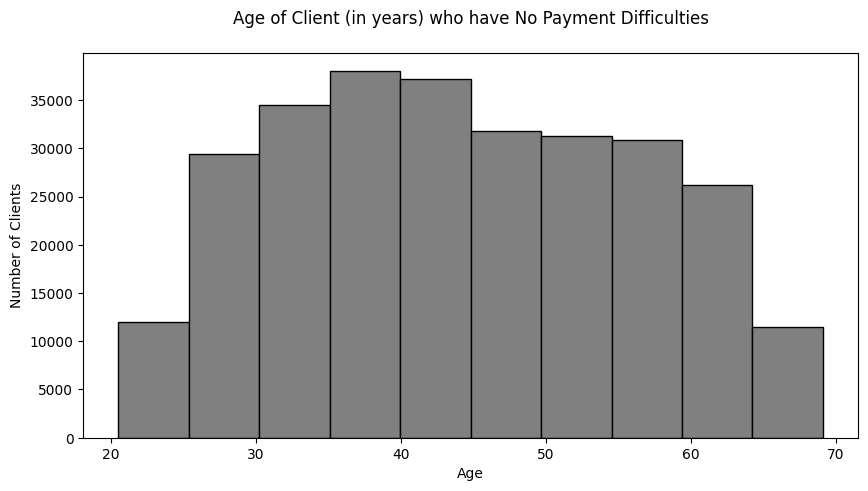

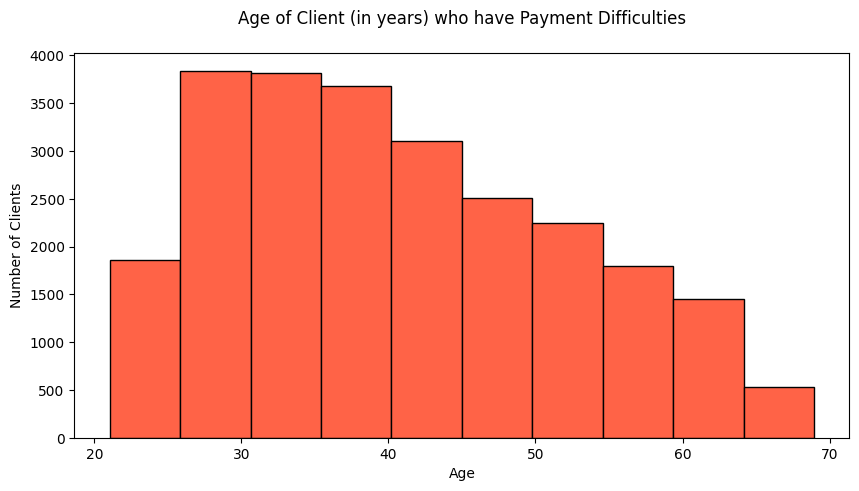

In [22]:
# Histogram umur dari semua klien
plt.figure(figsize=(10,5))
plt.hist(abs(app_train_app['DAYS_BIRTH'].values/365), bins=10, edgecolor='black', color='purple')
plt.title('Age of Client (in years) at The Time of Application\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Histogram umur dari klien yang tidak kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(10,5))
plt.hist(age_no, bins=10, edgecolor='black', color='grey')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Histogram umur dari klien yang kesulitan dalam pembayaran pinjaman
plt.figure(figsize=(10,5))
plt.hist(age_yes, bins=10, edgecolor='black', color='tomato')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Bivariate Analysis : Categorical Features vs Target

## Contract Type vs Target

In [23]:
# Pinjaman berdasarkan jenisnya dan kemampuan pembayaran klien
contract_target = app_train_app.groupby(by=['NAME_CONTRACT_TYPE', 'TARGET'], as_index=False).count()
contract_target

,NAME_CONTRACT_TYPE,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,No Payment Difficulties,255011,255011,255011,255011,255011,255011,254999,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,172137,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,254462,205629,125983,106068,131014,119495,127008,128524,103759,127418,114670,125983,106068,131014,119495,127008,128524,103759,127418,114670,125983,106068,131014,119495,127008,128524,103759,127418,114670,127417,132339,125751,134557,255010,255010,255010,255010,255010,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,255011,221757,221757,221757,221757,221757,221757
1,Cash loans,Payment Difficulties,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,17295,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23171,17945,9841,8210,10280,9246,9902,10039,8141,9997,8860,9841,8210,10280,9246,9902,10039,8141,9997,8860,9841,8210,10280,9246,9902,10039,8141,9997,8860,9984,10379,9839,10566,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,19236,19236,19236,19236,19236,19236
2,Revolving loans,No Payment Difficulties,27675,27675,27675,27675,27675,27675,27675,27418,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,20436,27673,27675,27675,27675,27675,27675,27675,27675,27675,27675,27616,21769,14927,12713,15473,14215,15061,15206,12441,15029,13664,14927,12713,15473,14215,15061,15206,12441,15029,13664,14927,12713,15473,14215,15061,15206,12441,15029,13664,15092,15622,14865,15872,26691,26691,26691,26691,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,27675,23702,23702,23702,23702,23702,23702
3,Revolving loans,Payment Difficulties,1604,1604,1604,1604,1604,1604,1604,1583,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1252,1604,1604,1604,1604,1604,1604,1604,1604,1604,1604,1602,1203,699,577,737,664,712,722,580,7

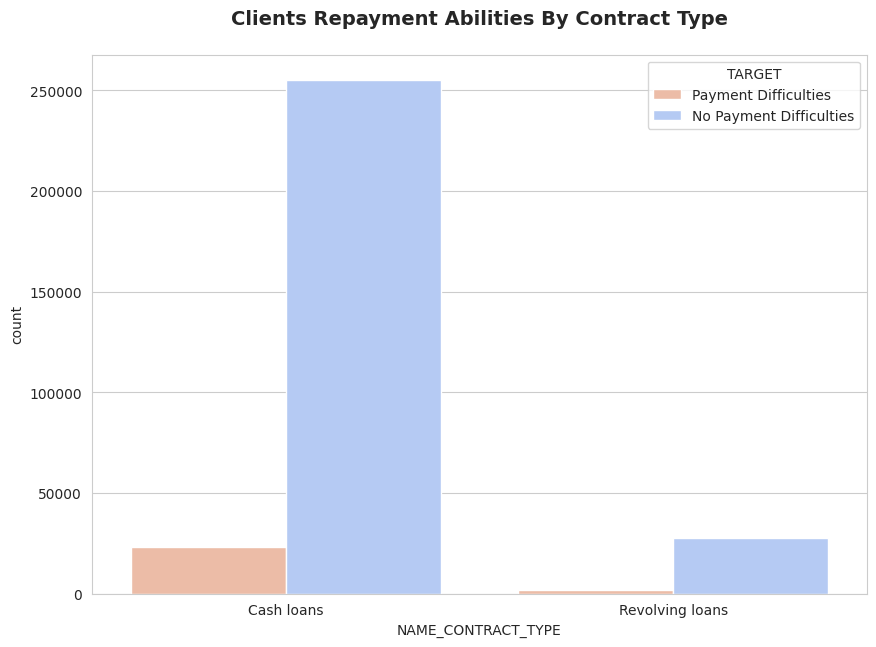

In [24]:
# Grafik kemampuan pembayaran klien berdasarkan jenis pinjaman
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(data=app_train_app, x='NAME_CONTRACT_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', size = 14)
plt.show()

Pinjaman tunai (cash loans) merupakan mayoritas jenis pinjaman dari dataset ini yaitu sebanyak 278232 pinjaman. Sementara pinjaman bergulir (revolving loans) jumlahnya jauh lebih rendah yaitu 29279 pinjaman.

In [25]:
app_train[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


Berdasarkan tabel di atas, klien yang mengambil jenis pinjaman Cash loans lebih berpeluang mengalami kesulitan pembayaran pinjaman dibandingkan klien yang mengambil jenis pinjaman revolving loans. Hal ini dikarenakan sebanyak 7,18% klien yang mengambil pinjaman cash loans mengalami kesulitan pembayaran pinjaman sementara sekitar 4,34% yang mengambil pinjaman revolving loans mengalami kesulitan pembayaran pinjaman.

## Income Type vs Target

In [26]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pendapatan
app_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


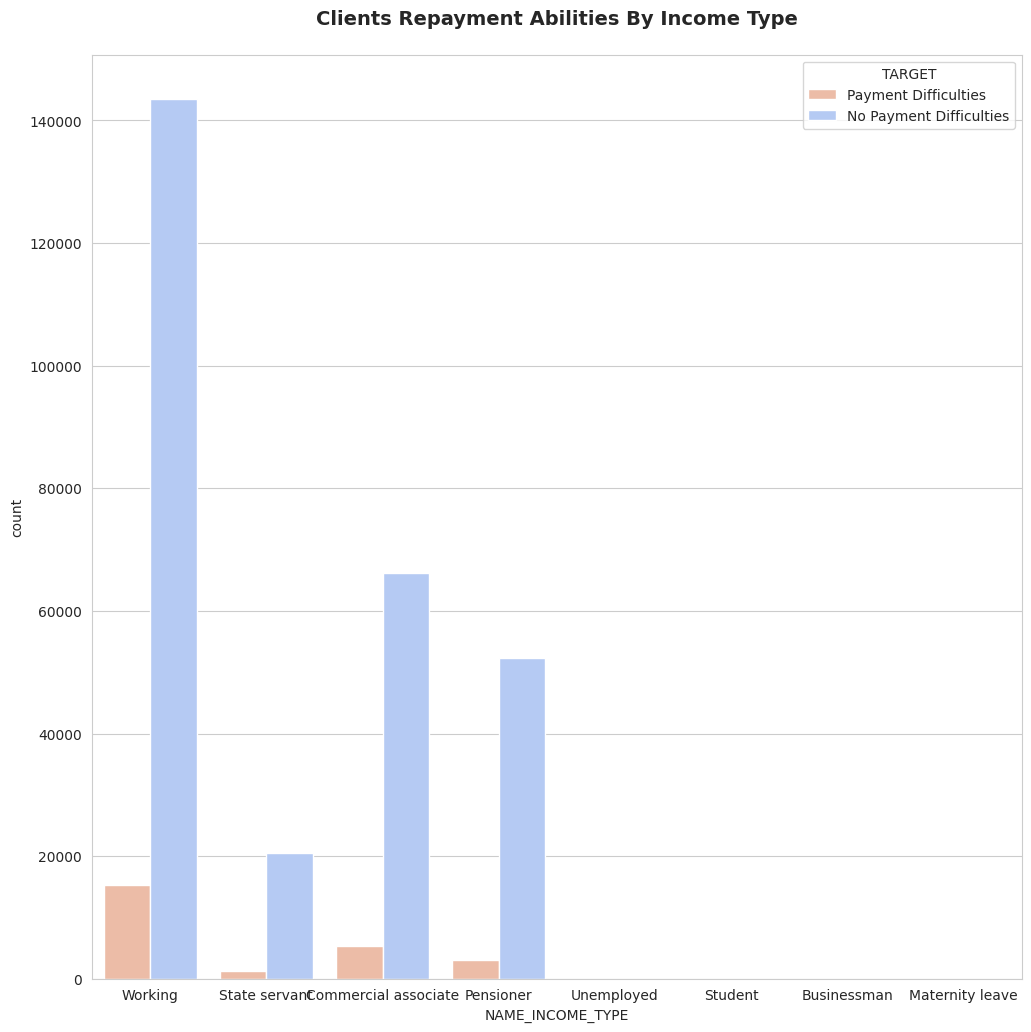

In [27]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pendapatan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=app_train_app, x='NAME_INCOME_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Income Type\n', fontweight='bold', size = 14)
plt.show()

Sebagian besar pemohon pinjaman memperoleh pendapatan dari bekerja (working), kemudian diikuti commercial associate, pensioner dan state servant.

Klien yang memiliki jenis pendapatan working merupakan klien mayoritas yang mengajukan pinjaman yaitu sebesar 158774 orang. Namun dari jumlah tersebut sekitar 15224 klien merupakan klien yang mengalami kesulitan melakukan pembayaran pinjaman. Dimana jumlah tersebut merupakan 61.32% dari keseluruhan klien yang kesulitan melakukan pembayaran pinjaman.

Klien dengan tipe pengusaha dan pelajar tidak mengalami kesulitan dalam melunasi pinjamanya.

Klien dangan jenis pendapatan maternity leave, 40%-nya mengalami kesulitan dalam pembayaran pinjaman dan jenis pendapatan unemployed, sekitar 36%-nya juga mengalami kesulitan dalam pembayaran pinjaman.

## Housing Type vs Target

In [28]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
housing_target = app_train_app.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False).count()
housing_target

,NAME_HOUSING_TYPE,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Co-op apartment,No Payment Difficulties,1033,1033,1033,1033,1033,1033,1033,1033,1031,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,771,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1031,865,590,463,612,549,592,602,443,588,516,590,463,612,549,592,602,443,588,516,590,463,612,549,592,602,443,588,516,590,619,585,628,1028,1028,1028,1028,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,922,922,922,922,922,922
1,Co-op apartment,Payment Difficulties,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,74,89,89,89,89,89,89,89,89,89,89,88,66,48,38,50,44,48,49,33,46,38,48,38,50,44,48,49,33,46,38,48,38,50,44,48,49,33,46,38,49,50,48,50,88,88,88,88,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,70,70,70,70,70,70
2,House / apartment,No Payment Difficulties,251596,251596,251596,251596,251596,251596,251596,251586,251379,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,168967,251595,251596,251596,251596,251596,251596,251596,251596,251596,251596,251075,203302,125453,105850,130330,119213,126460,127893,103462,126734,114343,125453,105850,130330,119213,126460,127893,103462,126734,114343,125453,105850,130330,119213,126460,127893,103462,126734,114343,126776,131591,125185,133759,250719,250719,250719,250719,251595,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,251596,219243,219243,219243,219243,219243,219243
3,House / apartment,Payment Difficulties,21272,21272,21272,21272,21272,21272,21272,21272,21255,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,15718,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21232,16502,9060,7579,9467,8541,9120,9245,7494,9201,8189,9060,7579,9467,8541,9120,9245,7494,9201,8189,9060,7579,9467,8541,9120,9245,7494,9201,8189,9195,9542,9081,9715,21241,21241,21241,21241,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,21272,17687,17687,17687,17687,17687,17687
4,Municipal apartment,No Payment Difficulties,

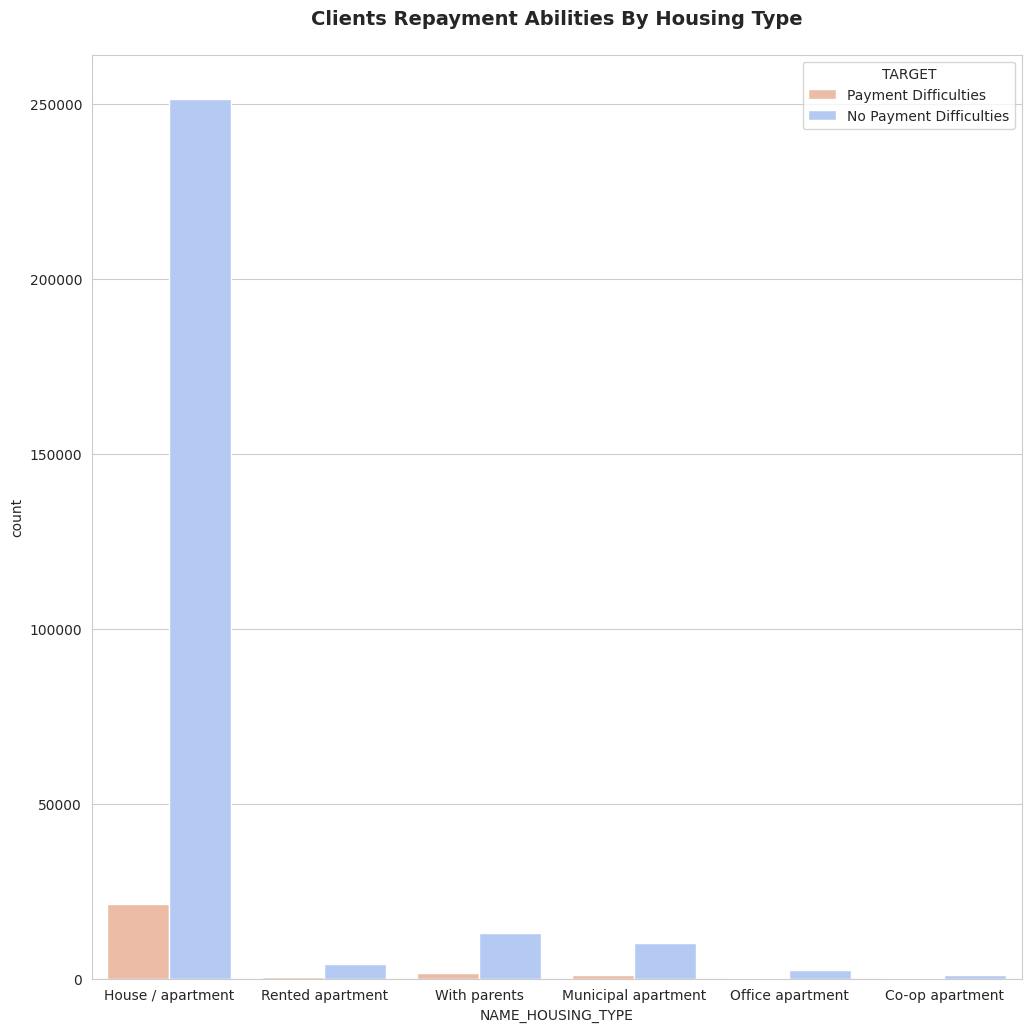

In [29]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=app_train_app, x='NAME_HOUSING_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', size = 14)
plt.show()

## Occupation Type vs Target

In [30]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
occupation_target = app_train_app.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False).count()
occupation_target

,OCCUPATION_TYPE,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Accountants,No Payment Difficulties,9339,9339,9339,9339,9339,9339,9339,9338,9328,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9338,9339,9339,9339,9339,9339,9339,9339,9339,9339,9316,7828,5258,4486,5446,5058,5326,5362,4351,5315,4865,5258,4486,5446,5058,5326,5362,4351,5315,4865,5258,4486,5446,5058,5326,5362,4351,5315,4865,5311,5504,5239,5594,9293,9293,9293,9293,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,9339,8354,8354,8354,8354,8354,8354
1,Accountants,Payment Difficulties,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,472,395,234,192,246,226,239,241,199,240,222,234,192,246,226,239,241,199,240,222,234,192,246,226,239,241,199,240,222,237,249,239,251,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,474,412,412,412,412,412,412
2,Cleaning staff,No Payment Difficulties,4206,4206,4206,4206,4206,4206,4206,4206,4201,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4197,3323,2202,1821,2293,2043,2216,2248,1820,2237,1972,2202,1821,2293,2043,2216,2248,1820,2237,1972,2202,1821,2293,2043,2216,2248,1820,2237,1972,2245,2326,2201,2358,4191,4191,4191,4191,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,3597,3597,3597,3597,3597,3597
3,Cleaning staff,Payment Difficulties,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,337,201,172,205,187,202,204,165,205,182,201,172,205,187,202,204,165,205,182,201,172,205,187,202,204,165,205,182,199,208,199,213,445,445,445,445,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,447,365,365,365,365,365,365
4,Cooking staff,No Payment Difficulties,5325,5325,5325,5325,5325,5325,5325,5324,5319,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5325,5311,4186,2307,1881,2412,2144,2322,2359,1898,2343,2063,2307,1881,2412,2144

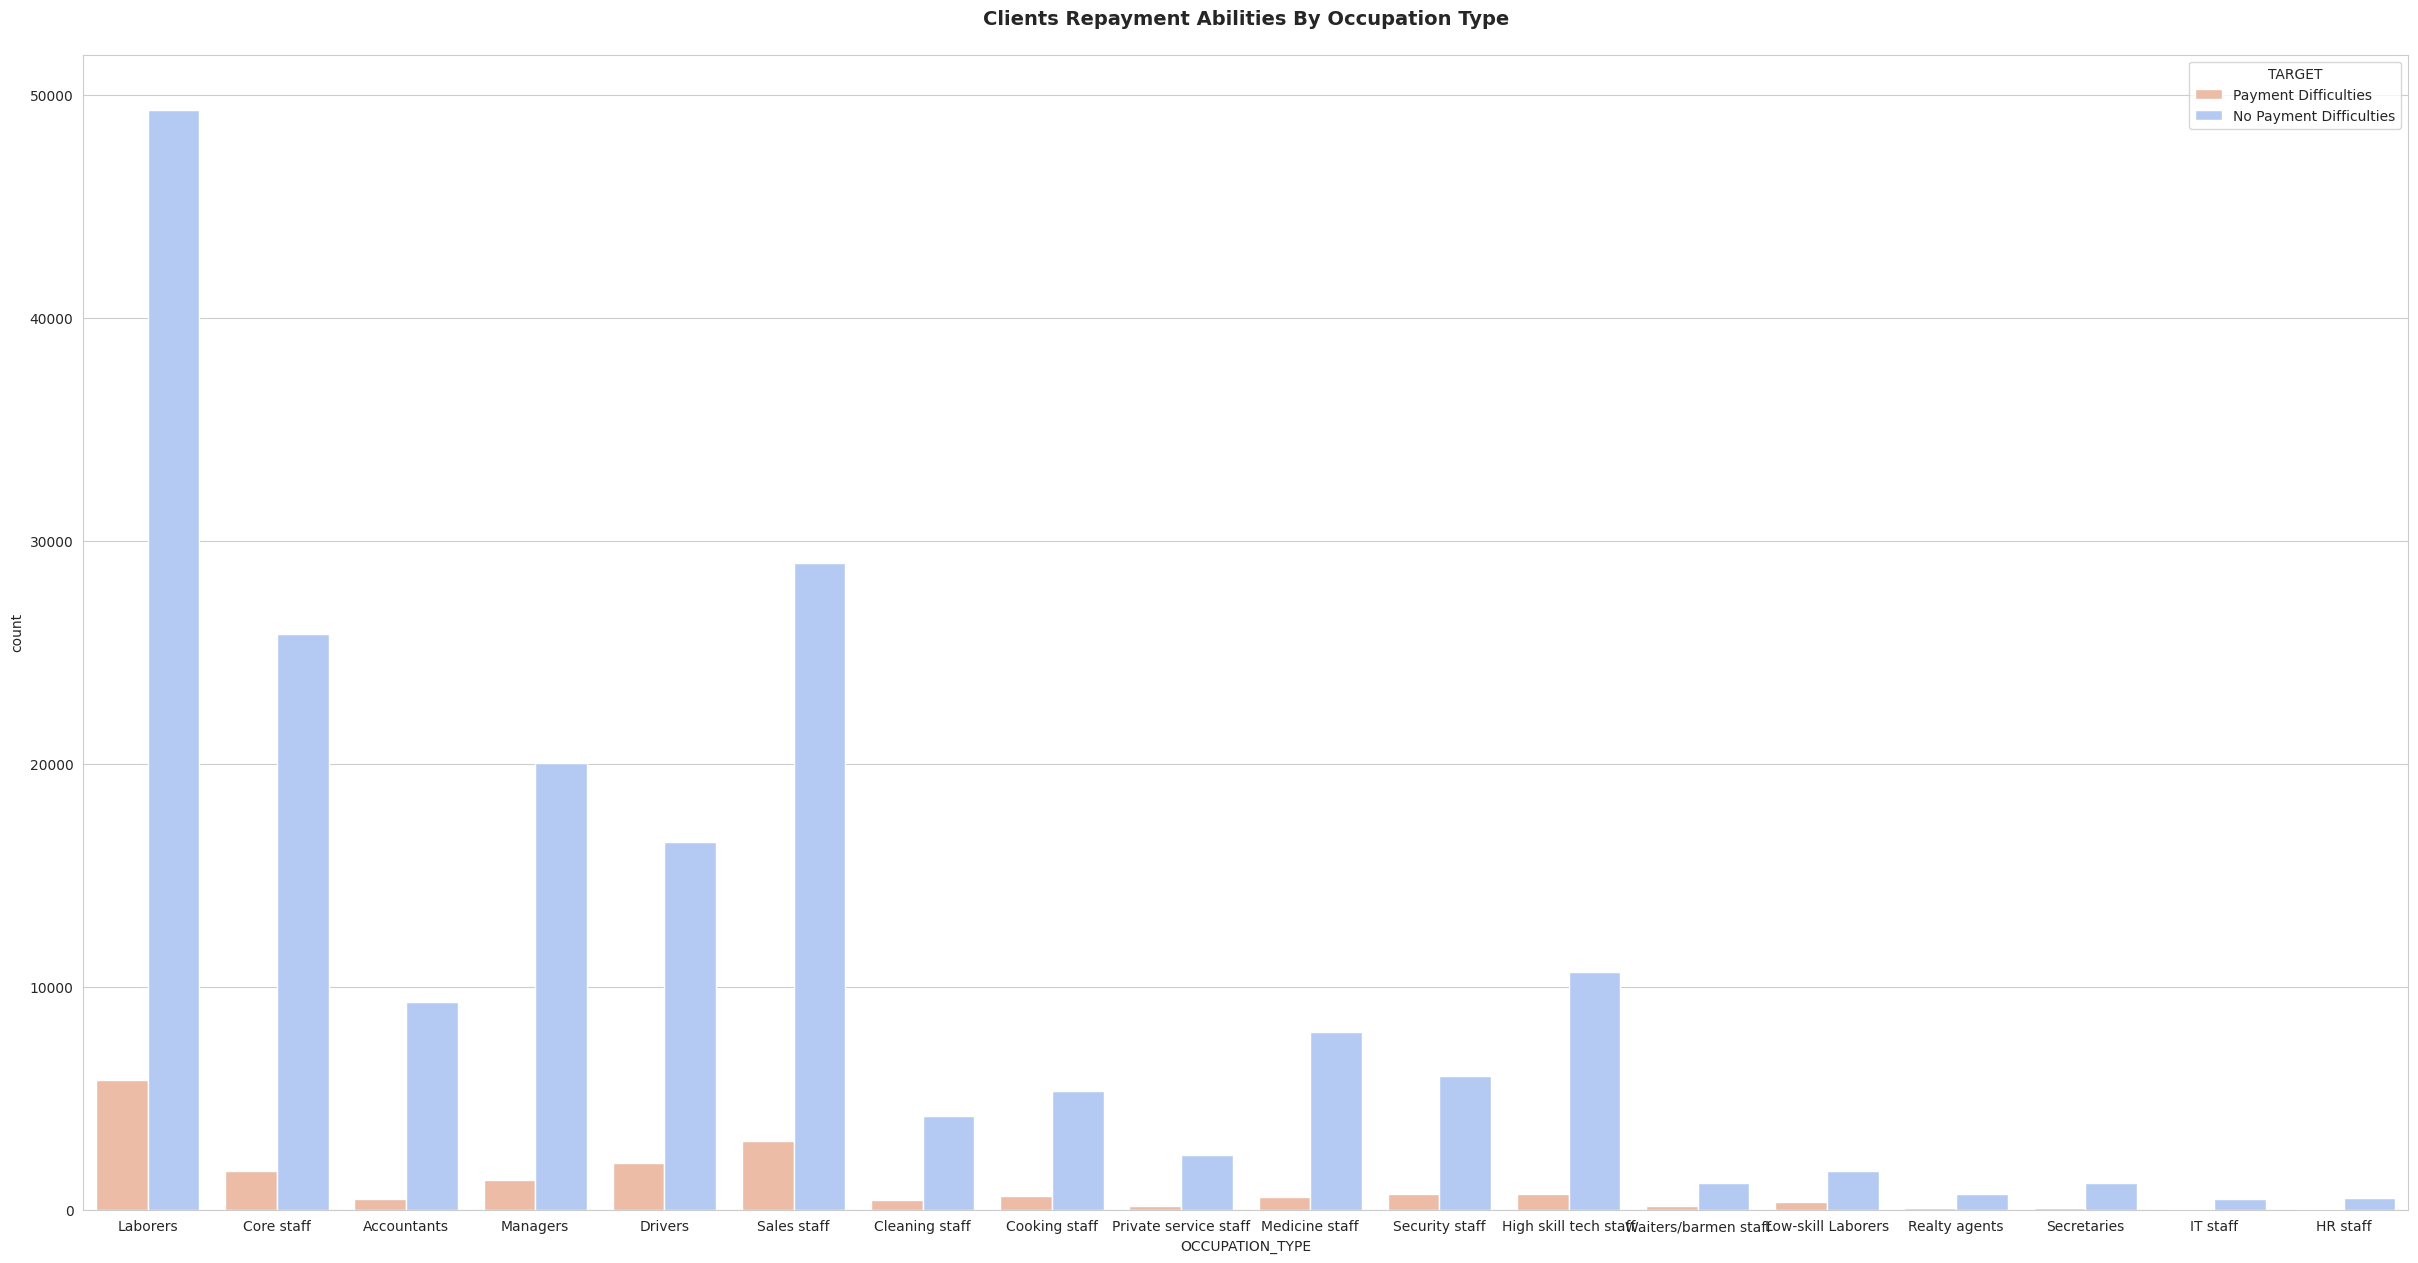

In [31]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
plt.figure(figsize=(30,15))
sns.set_style('whitegrid')
sns.countplot(data=app_train_app, x='OCCUPATION_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', size = 14)
plt.show()

Sejumlah besar pinjaman (55186 pinjaman) diajukan oleh klien yang bekerja sebagai buruh. Sebanyak 5838 dari jumlah tersebut merupakan pinjaman yang diajukan klien yang kesulitan melakukan pembayaran. Jumlah ini setara dengan 23.5% dari keseluruhan klien yang mengalami kesulitan pembayaran.

## Income Type, Amount of Credit, Target and Contract Type

In [32]:
# Membuat dataframe jumlah peminjam berdasarkan jenis pendapatan, jenis pinjaman dan kemampuan pembayaran pinjaman
app_train_app.groupby(by=['NAME_INCOME_TYPE', 'TARGET','NAME_CONTRACT_TYPE'], as_index=False).count()

,NAME_INCOME_TYPE,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Businessman,No Payment Difficulties,Revolving loans,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,8,10,10,10,10,10,10,10,10,10,10,10,4,9,8,9,8,8,9,7,9,8,9,8,9,8,8,9,7,9,8,9,8,9,8,8,9,7,9,8,9,9,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,4,4,4,4,4,4
1,Commercial associate,No Payment Difficulties,Cash loans,58662,58662,58662,58662,58662,58662,58659,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,48538,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58546,46846,32713,27501,33976,31221,33072,33403,26613,33068,30069,32713,27501,33976,31221,33072,33403,26613,33068,30069,32713,27501,33976,31221,33072,33403,26613,33068,30069,33135,34339,32641,34868,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,58662,51001,51001,51001,51001,51001,51001
2,Commercial associate,No Payment Difficulties,Revolving loans,7595,7595,7595,7595,7595,7595,7595,7551,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,6245,7593,7595,7595,7595,7595,7595,7595,7595,7595,7595,7579,5742,4494,3825,4664,4324,4556,4582,3688,4538,4147,4494,3825,4664,4324,4556,4582,3688,4538,4147,4494,3825,4664,4324,4556,4582,3688,4538,4147,4541,4707,4482,4771,7282,7282,7282,7282,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,6349,6349,6349,6349,6349,6349
3,Commercial associate,Payment Difficulties,Cash loans,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4202,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4981,3892,2406,1993,2504,2258,2423,2455,1966,2439,2165,2406,1993,2504,2258,2423,2455,1966,2439,2165,2406,1993,2504,2258,2423,2455,1966,2439,2165,2430,2534,2405,2574,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4167,4167,4167,4167,4167,4167
4,Commercial associate,Payment Difficulties,Revolving loans,370,370,370,370,370,370,370,367,370,370,370,370,370,370,370,370,370,370,370,370,370,370,335,370,370,370,37

In [33]:
app_train.drop('EMERGENCYSTATE_MODE', axis=1, inplace=True)

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

#MISSING VALUES

##Missing Value Checking

In [34]:
check_missing = app_train.isnull().sum() * 100 / app_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
NONLIVINGAREA_AVG              55.179164
WALLSMATERIAL_MODE             50.840783
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
HOUSETYPE_MODE                 50.176091
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
DAYS_LAST_PHONE_CHANGE          0.000325
dtype: float64

In [35]:
#Mengecek Missing Data
app_train.isnull().sum()

TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
REGION_RATING_CLIENT                0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT

###Missing Values Filling

In [36]:
app_train['LANDAREA_AVG'].fillna(0, inplace=True)
app_train['NONLIVINGAREA_AVG'].fillna(0, inplace=True)
app_train['WALLSMATERIAL_MODE'].fillna(0, inplace=True)
app_train['APARTMENTS_AVG'].fillna(0, inplace=True)
app_train['ENTRANCES_AVG'].fillna(0, inplace=True)
app_train['HOUSETYPE_MODE'].fillna(0, inplace=True)
app_train['FLOORSMAX_AVG'].fillna(0, inplace=True)
app_train['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
app_train['EXT_SOURCE_3'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
app_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
app_train['EXT_SOURCE_2'].fillna(0, inplace=True)
app_train['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

In [37]:
#Drop baris dengan Missing Values
app_train = app_train.dropna(axis=0, how='any')

In [38]:
app_train.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
APARTMENTS_AVG                 0
BASEMENTAR

#FEATURE SCALING AND TRANSFORMATION

##Label Encoding

Semua kolom kategorikal dilakukan Label Encoding.

In [39]:
categorical_cols = [col for col in app_train.select_dtypes(include='object').columns.tolist()]

In [40]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [41]:
#Label encoding kolom 'NAME_CONTRACT_TYPE'
mapping_NAME_CONTRACT_TYPE = {
  'Cash loans' : 0,
  'Revolving loans' : 1,
}
app_train['NAME_CONTRACT_TYPE'] = app_train['NAME_CONTRACT_TYPE'].map(mapping_NAME_CONTRACT_TYPE)

#Label encoding kolom 'CODE_GENDER'
mapping_CODE_GENDER = {
  'M' : 0,
  'F' : 1,
  'XNA' : 2,
}
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].map(mapping_CODE_GENDER)

#Label encoding kolom 'FLAG_OWN_CAR'
mapping_FLAG_OWN_CAR = {
    'N' : 0,
    'Y' : 1,
}
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].map(mapping_FLAG_OWN_CAR)

#Label encoding kolom 'FLAG_OWN_REALTY'
mapping_FLAG_OWN_REALTY = {
    'Y' : 0,
    'N' : 1,
}
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].map(mapping_FLAG_OWN_REALTY)

#Label encoding kolom 'NAME_INCOME_TYPE'
mapping_NAME_INCOME_TYPE = {
    'Working' : 0,
    'State servant' : 1,
    'Commercial associate' : 2,
    'Pensioner' : 3,
    'Unemployed' : 4,
    'Student' : 5,
    'Businessman' : 6,
    'Maternity leave' : 7,
}
app_train['NAME_INCOME_TYPE'] = app_train['NAME_INCOME_TYPE'].map(mapping_NAME_INCOME_TYPE)

#Label encoding kolom 'NAME_EDUCATION_TYPE'
mapping_NAME_EDUCATION_TYPE = {
    'Secondary / secondary special' : 0,
    'Higher education' : 1,
    'Incomplete higher' : 2,
    'Lower secondary' : 3,
    'Academic degree' : 4,
}
app_train['NAME_EDUCATION_TYPE'] = app_train['NAME_EDUCATION_TYPE'].map(mapping_NAME_EDUCATION_TYPE)

#Label encoding kolom 'NAME_FAMILY_STATUS
mapping_NAME_FAMILY_STATUS = {
    'Single / not married' : 0,
    'Married' : 1,
    'Civil marriage' : 2,
    'Widow' : 3,
    'Separated' : 4,
    'Unknown': 5,
}
app_train['NAME_FAMILY_STATUS'] = app_train['NAME_FAMILY_STATUS'].map(mapping_NAME_FAMILY_STATUS)

#Label encoding kolom 'NAME_HOUSING_TYPE'
mapping_NAME_HOUSING_TYPE = {
    'House / apartment' : 0,
    'Rented apartment' : 1,
    'With parents' : 2,
    'Municipal apartment' : 3,
    'Office apartment' : 4,
    'Co-op apartment' : 5,
}
app_train['NAME_HOUSING_TYPE'] = app_train['NAME_HOUSING_TYPE'].map(mapping_NAME_HOUSING_TYPE)

#Label encoding kolom 'HOUSETYPE_MODE'
mapping_HOUSETYPE_MODE = {
    'block of flats' : 0,
    'terraced house' : 1,
    'specific housing': 2,
    0 : 3,
}
app_train['HOUSETYPE_MODE'] = app_train['HOUSETYPE_MODE'].map(mapping_HOUSETYPE_MODE)

#Label encoding kolom 'WALLSMATERIAL_MODE'
mapping_WALLSMATERIAL_MODE = {
    'Stone, brick' : 0,
    'Block' : 1,
    'Panel' : 2,
    'Mixed' : 3,
    'Wooden' : 4,
    'Others' : 5,
    'Monolithic':6,
    0 : 7,
}
app_train['WALLSMATERIAL_MODE'] = app_train['WALLSMATERIAL_MODE'].map(mapping_WALLSMATERIAL_MODE)

In [42]:
Encod = app_train[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                  'NAME_HOUSING_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']]

In [43]:
Encod.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,0,0,1
13,0,0,1,1,0,0,1,0,0,2
14,0,1,0,0,0,0,1,0,0,2
18,1,1,0,0,0,0,3,0,0,0


##Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [44]:
numerical_cols = [col for col in app_train.columns.tolist() if col not in categorical_cols + ['TARGET']]

In [45]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(app_train[numerical_cols]), columns=numerical_cols)

In [46]:
std.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.572131,0.060248,-0.515142,-0.252075,1.527472,-0.448994,0.443375,0.594737,0.0028,-0.460999,0.047651,1.483348,-0.269133,0.034820,-0.11195,-0.22025,-0.185441,-0.35709,-1.465523,-1.036257,-0.887770,-0.625225,-0.143011,-0.830692,-1.059920,-0.300109,-0.395550,0.252669,4.216122,-0.166834,-0.007408,0.66937,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.348135
1,-0.572131,0.256021,1.581650,-1.201470,-0.143155,-0.452929,1.121012,1.801924,0.0028,-0.460999,0.047651,1.483348,-0.269133,-1.773793,-0.11195,-0.22025,-0.185441,-0.35709,0.456265,-1.559204,-0.236968,-0.431140,0.119835,-1.170102,0.396188,-0.599213,-0.246544,-0.150081,-0.311665,0.195042,-0.007408,0.66937,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.885055
2,0.896097,0.125506,0.695006,-0.388263,0.469606,-0.466069,1.270466,-1.247395,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.034820,-0.11195,-0.22025,-0.185441,-0.35709,0.160270,1.330216,0.233766,0.107448,0.028145,-0.152856,0.686850,0.403223,-0.395550,-0.552832,-0.311665,1.169506,-0.007408,0.66937,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.348135
3,-0.572131,0.021093,0.352704,-0.799253,0.355929,-0.445894,1.278173,0.636978,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.034820,-0.11195,-0.22025,-0.185441,-0.35709,0.565435,-1.559204,2.081057,0.546567,0.392869,0.186554,3.016343,1.438197,1.126441,-0.552832,-0.311665,0.951907,-0.007408,0.66937,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.885055
4,-0.572131,-0.200783,-1.104050,1.453787,-0.361132,-0.500177,-0.961166,1.163019,0.0028,-0.460999,0.047651,1.483348,-0.269133,-1.773793,-0.11195,-0.22025,-0.185441,-0.35709,0.906536,0.529676,-0.859435,-0.324393,0.180962,-0.492266,-1.059920,-0.412742,-0.395550,2.669173,-0.311665,0.891594,-0.007408,0.66937,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.885055


##Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi

In [47]:
data_model = pd.concat([Encod, std, app_train['TARGET']], axis=1)

In [48]:
data_model.sample(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
42065,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,-0.572131,-0.135525,-0.786271,0.805013,-0.991048,-0.459984,1.057707,-0.252736,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.03482,-0.11195,-0.22025,-0.185441,-0.35709,1.275844,0.462646,-0.114486,-0.520904,0.038332,-1.170102,-0.477198,0.130400,-0.39555,-0.552832,-0.311665,-1.756251,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,-0.885055,1.0
72259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.572131,-0.005010,-0.838082,-0.233411,-0.753400,-0.469011,-0.642440,0.040975,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.03482,-0.11195,-0.22025,-0.185441,-0.35709,-0.778611,1.386366,-0.472792,0.062566,0.211526,-0.152856,-0.477198,-0.351420,-0.39555,1.863672,-0.311665,-2.446891,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,-0.399827,0.188786,NaN
29676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896097,-0.266040,-0.401893,-0.979177,0.012609,-0.451600,-0.353440,-0.623671,0.0028,2.169203,0.047651,1.483348,-0.269133,0.03482,-0.11195,-0.22025,-0.185441,-0.35709,0.589434,-0.027013,-0.402411,-0.399601,0.007769,-0.830692,-0.331866,0.110377,-0.33169,1.863672,1.952228,-0.885856,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,3.024256,-0.348135,NaN
282888,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
21564,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,-0.572131,-0.233412,-1.104050,-0.252075,-0.941414,2.163951,-0.867310,0.978872,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.03482,-0.11195,-0.22025,-0.185441,-0.35709,-1.732327,-0.787786,-0.642805,-0.751381,-0.153199,-0.152856,-0.477198,-0.381455,-0.39555,-0.552832,-0.311665,1.093819,-0.007408,-1.493941,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.15736,-0.280593,3.024256,-0.885055,0.0


In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [50]:
data_model_1 = pd.DataFrame(imputer.fit_transform(data_model), columns=data_model.columns)

In [51]:
data_model_1.sample(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
99413,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,-0.572131,-0.135525,-0.412531,3.089284,0.250943,2.163951,1.445517,-0.838179,0.0028,-0.460999,0.047651,-0.674151,-0.269133,0.034820,-0.11195,-0.22025,-0.185441,-0.357090,-1.342773,-1.559204,-0.359451,-1.072835,0.160586,-0.152856,-0.477198,-0.761905,-0.395550,-0.552832,-0.311665,1.174236,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.157360,-0.280593,-0.399827,-0.885055,0.0
21728,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,-0.572131,-0.305195,-1.030324,-0.162175,-0.099468,-0.453228,1.115507,1.992011,0.0028,-0.460999,0.047651,-0.674151,-0.269133,1.843434,-0.11195,-0.22025,-0.185441,-0.357090,-0.849761,-0.328288,-0.453597,-0.211580,-0.002419,-0.152856,-0.477198,-0.461550,-0.080813,1.460921,-0.311665,0.184398,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.157360,-0.280593,-0.399827,-0.885055,1.0
128582,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.896097,-0.331298,-0.944469,-0.841061,1.610042,-0.458456,0.203092,1.159059,0.0028,2.169203,0.047651,1.483348,-0.269133,0.034820,-0.11195,-0.22025,-0.185441,-0.357090,0.125751,1.172833,-0.171157,-0.002938,0.038332,0.525963,-0.477198,0.225513,-0.395550,-0.150081,-0.311665,-1.239454,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,4.937586,-0.280593,-0.399827,-0.885055,0.0
132652,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.364324,0.060248,1.003827,-0.162175,0.769240,-0.447929,0.238873,0.522794,0.0028,-0.460999,0.047651,-0.674151,-0.269133,1.843434,-0.11195,-0.22025,-0.185441,-0.357090,-1.824880,1.435462,-0.096205,0.103809,0.150399,-0.152856,0.686850,0.339397,-0.395550,0.252669,1.952228,0.551005,-0.007408,0.669370,-0.009286,-0.124722,-0.310115,-0.015079,-0.313263,-0.071509,-0.006261,-0.071619,-0.00396,-0.066699,-0.066521,-0.038825,-0.111266,-0.019401,-0.095711,-0.025822,-0.025516,-0.019401,-0.072974,-0.059943,-0.157360,-0.280593,-0.399827,2.873387,0.0
6587,0.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,-0.572131,0.256021,1.715220,1.453787,0.085115,-0.457328,-0.412616,-0.669213,0.0028,-0.460999,0.047651,-0.674151,-0.269133,-1.773793,-0.11195,-0.22025,-0.185441,2.800412,1.004771,0.098595,-1.000198,-0.841146,0.048520,-1.170102,-1.059920,-0.761905,-0.395550,-0.552832,-0.311665,-0.094696,-0.007408,-1.493941,-0.009286,-0.124722,-0.310115,-0.015079,3.192205,-0.071509,-0.006261,-0.071619,-0

#MODELING

##Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = data_model_1.drop('TARGET', axis=1)
y = data_model_1['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape, X_test.shape

((161719, 66), (40430, 66))

## Build Model

Beberapa algoritma yang akan digunakan untuk pemodelan, antara lain:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

##Logistic Regression#

In [55]:
# Melakukan proses pembuatan model : Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [56]:
#Memprediksi
y_pred_train_logreg = logreg.predict(X_train)
y_pred_test_logreg = logreg.predict(X_test)

In [57]:
#Menghitung Akurasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
training_acc_logreg = accuracy_score(y_train, y_pred_train_logreg)
testing_acc_logreg = accuracy_score(y_test, y_pred_test_logreg)

print("Training Accuracy: {}".format(training_acc_logreg))
print("Testing Accuracy: {}".format(testing_acc_logreg))

print("Precision: {}".format(precision_score(y_test, y_pred_test_logreg)))
print("Recall: {}".format(recall_score(y_test, y_pred_test_logreg)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test_logreg)))
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_test_logreg)))

Training Accuracy: 0.9564491494505902
Testing Accuracy: 0.956863715063072
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Hyperparameter Tuning - Logistic Regression

In [58]:
params = {'C':[0.01,0.1,1,2,3,5]}

In [59]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=logreg,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs=10,
    cv = 3)

In [60]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5]}, scoring='accuracy')

In [61]:
GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=10,
            param_grid={'C':[0.01,0.1,1,2,3,5]},
            scoring='accuracy')

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5]}, scoring='accuracy')

In [62]:
grid.best_params_

{'C': 0.01}

In [63]:
grid.best_score_

0.9564491494854961

##Decision Tree

In [64]:
# Melakukan proses pembuatan model : Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [65]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
#Memprediksi
y_pred_train = model_tree.predict(X_train)
y_pred_test = model_tree.predict(X_test)

In [67]:
#Menghitung Akurasi Model
training_acc_DT = accuracy_score(y_train, y_pred_train)
testing_acc_DT = accuracy_score(y_test, y_pred_test)

print("Accuracy: {}".format(testing_acc_DT))
print("Precision: {}".format(precision_score(y_test, y_pred_test)))
print("Recall: {}".format(recall_score(y_test, y_pred_test)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test)))
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_test)))

y_pred_test = model_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

Accuracy: 0.9363838733613653
Precision: 0.08433734939759036
Recall: 0.0481651376146789
F1-Score: 0.06131386861313869
AUC Score: 0.5122953589639854
0.9363838733613653


### Hyperparameter Tuning - Decision Tree

In [68]:
params = {'max_depth':[1,3,5,8,10,20,'max']}

In [69]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=model_tree,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs=10,
    cv = 3)

In [70]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 3, 5, 8, 10, 20, 'max']},
             scoring='accuracy')

In [71]:
GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=10,
            param_grid={'max_depth': [1, 3, 5, 7, 9, 'max']},
            scoring='accuracy')

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 'max']},
             scoring='accuracy')

In [72]:
grid.best_params_

{'max_depth': 1}

In [73]:
grid.best_score_

0.9564491494854961

##Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


In [76]:
# Memprediksi
y_train_pred_dt = rf_model.predict(X_train)
y_test_pred_dt = rf_model.predict(X_test)

In [77]:
#Menghitung Akurasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
training_acc_RandF = accuracy_score(y_train, y_train_pred_dt)
testing_acc_RandF = accuracy_score(y_test, y_test_pred_dt)

print("Training Accuracy: {}".format(training_acc_RandF))
print("Testing Accuracy: {}".format(testing_acc_RandF))

print("Precision: {}".format(precision_score(y_test, y_pred_test)))
print("Recall: {}".format(recall_score(y_test, y_pred_test)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test)))
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_test)))

Training Accuracy: 0.9758469938597196
Testing Accuracy: 0.9558990848379916
Precision: 0.08433734939759036
Recall: 0.0481651376146789
F1-Score: 0.06131386861313869
AUC Score: 0.5122953589639854
